# CAPSTONE PROYECT - CLEAN DATA - BLIND WINE TASTING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns',500)

There are two datasets, that I am going to use to analyze:
- df1, that initially contains the 37803 rows and 16 columns. This data was scraped from the website  https://www.winemag.com/?s=&drink_type=wine&page=1
- Vino, that initially contains 141617 rows and 15 columns. This data was download form Kaggle, last actualization was in March 2019.

# SMALL WINE DATASET

This is the dataset I scraped from this website https://www.winemag.com/?s=&drink_type=wine&page=1

Below there is all the cleaning data process.

In [2]:
df_100 = pd.read_csv('wine100.csv')
df_200 = pd.read_csv('wine200.csv')
df_300 = pd.read_csv('wine300.csv')
df_400 = pd.read_csv('wine500.csv')
df_500 = pd.read_csv('wine600.csv')
df_600 = pd.read_csv('wine700.csv')
df_700 = pd.read_csv('wine800.csv')
df_800 = pd.read_csv('wine900.csv')
df_900 = pd.read_csv('wine1200.csv')
df_1000 = pd.read_csv('wine1300.csv')
df_1100 = pd.read_csv('wine1400.csv')
df_1200 = pd.read_csv('wine1500.csv')
df_1300 = pd.read_csv('wine1600.csv')
df_1400 = pd.read_csv('wine1700.csv')
df_1500 = pd.read_csv('wine1800.csv')
df_1600 = pd.read_csv('wine1900.csv')
df_1700 = pd.read_csv('wine2000.csv')
df_1800 = pd.read_csv('wine2100.csv')
df_1900 = pd.read_csv('wine2300.csv')

In [3]:
#Concant the 3 files with the scraping data.
df_1 = pd.concat([df_100, df_200, df_300, df_400, df_500, df_600, df_700,
                  df_800, df_900, df_1000, df_1100, df_1200, df_1300, df_1400, df_1500, df_1600,
                  df_1700, df_1800, df_1900], sort = False)
df_1.to_csv('wine1000.csv', index=False)


In [4]:
df1 = pd.read_csv('wine1000.csv')

In [5]:
print("Number of rows and columns:",df1.shape)

Number of rows and columns: (37803, 15)


In [6]:
df1.head()

,Unnamed: 0,Unnamed: 0.1,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,0.0,France,"Voluptuous and penetrating, this pure Grenache...",Cuvée de Mon Aïeul,99points,"N/A,",Châteauneuf-du-Pape,Rhône Valley,NaN,Anna Lee C. Iijima,NaN,99pointsDomaine Pierre Usseglio et Fils 2016 C...,Grenache,Domaine Pierre Usseglio et Fils
1,1,1.0,France,"Buxom and heady, this is a delightfully rich, ...",Vieilles Vignes,99points,"$114,",Châteauneuf-du-Pape,Rhône Valley,NaN,Anna Lee C. Iijima,NaN,99pointsDomaine de la Janasse 2016 Vieilles Vi...,Rhône-style Red Blend,Domaine de la Janasse
2,2,2.0,France,"Concentrated, unctuous black-cherry and plum f...",La Réserve des Cieux,98points,"N/A,",Châteauneuf-du-Pape,Rhône Valley,NaN,Anna Lee C. Iijima,NaN,98pointsDomaine l'Abbé Dîne 2016 La Réserve de...,Grenache,Domaine l'Abbé Dîne
3,3,3.0,France,"Sultry and silken on the palate, this wine sta...",La Réserve,98points,"$175,",Châteauneuf-du-Pape,Rhône Valley,NaN,Anna Lee C. Iijima,NaN,98pointsDomaine le Clos du Caillou 2016 La Rés...,Rhône-style Red Blend,Domaine le Clos du Caillou
4,4,4.0,NaN,The wine's fine perfumed black plum fruits giv...,NaN,98points,"$120,",Port,Port Blend,Portugal,Roger Voss,NaN,98pointsFonseca 2017 Port,Port,Fonseca


In [7]:
# Drop the Unnamed columns.
# Drop Taster_twitter_handle I am not going to use it. 
df1.drop(["Unnamed: 0","Unnamed: 0.1", "taster_twitter_handle"], axis=1, inplace=True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37803 entries, 0 to 37802
Data columns (total 12 columns):
country        31756 non-null object
description    37803 non-null object
designation    27915 non-null object
points         37803 non-null object
price          37803 non-null object
province       37803 non-null object
region_1       37803 non-null object
region_2       9331 non-null object
taster_name    37803 non-null object
title          37803 non-null object
variety        37803 non-null object
winery         37803 non-null object
dtypes: object(12)
memory usage: 3.5+ MB


In [9]:
#Missing values
df1.isnull().sum()

country         6047
description        0
designation     9888
points             0
price              0
province           0
region_1           0
region_2       28472
taster_name        0
title              0
variety            0
winery             0
dtype: int64

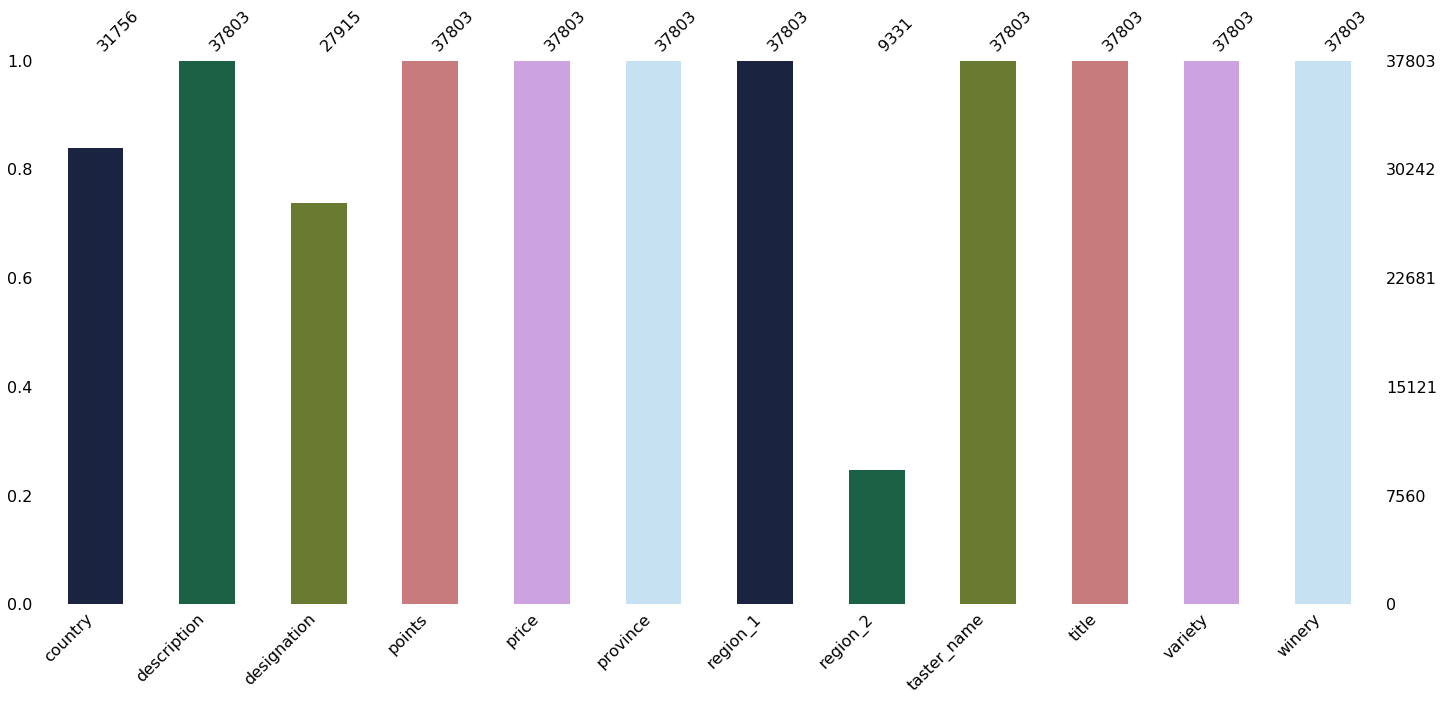

In [10]:
#### Missing values
#This plot represents the number of values that are in each column.
msno.bar(df1,color= sns.color_palette('cubehelix'));

In [11]:
#COLUMN 'POINTS'

# Remove the points from title
df1.title = df1.title.apply(lambda x: x[8:])
# Remove 'points' in points and combert them in float
df1.points = df1.points.apply(lambda x: int(x[:2]))

In [12]:
#COLUMN 'PRICE'

# Remove '$' and ',' from price
df1.price = df1.price.apply(lambda x: x.replace('$', "").replace(',', ""))
#drop the rows wiht no values in price and convert prices in floats
df1 = df1[df1.price != 'N/A']
df1.price = df1.price.apply(lambda x: float(x))

In [13]:
#COLUMN 'COUNTRY'

# I discover there are some countries with null values and the real value is in the columns region_2 or region_1 or province
# Change NaN country when the country is in region_2 or region_1 or province
df1['country'] = [i[1] if i[1] == 'Portugal' or i[1] == 'Germany' or i[1] == 'Austria' or i[1] == 'Brazil'
                     or i[1] == 'Chile' or i[1] == 'England' or i[1] == 'Hungary'
                  or i[1] == 'Switzerland' or i[1] == 'Georgia' or i[1] == 'Turkey' or i[1] == 'Luxembourg'
                  or i[1] == 'Bulgaria' or i[1] == 'US' or i[1] == 'Romania' or i[1] == 'New Zealand' 
                  or i[1] == 'Lebanon' or i[1] == 'Moldova' or i[1] == 'India' or i[1] == 'Serbia'
                  or i[1] == 'Bosnia and Herzegovina' or i[1] == 'France' or i[1] == 'Israel' or i[1] == 'Greece'
                  or i[1] == 'South Africa' or i[1] == 'Argentina' or i[1] == 'Uruguay' or i[1] == 'France'
                  or i[1] == 'Peru' or i[1] == 'Slovenia' or i[1] == 'Morocco' or i[1] == 'Croatia'
                  or i[1] == 'Armenia' or i[1] =='Czech Republic' or i[1] == 'Italy' or i[1] == 'Kosovo'
                  or i[1] == 'China'
                      else i[0] for i in zip(df1.country, df1.region_2)]
df1['country'] = [u[1] if u[1] == 'Portugal' or u[1] == 'Germany' or u[1] == 'Austria' or u[1] == 'Brazil'
                     or u[1] == 'Chile' or u[1] == 'New Zealand' or u[1] == 'Argentina' or u[1] == 'England'
                  or u[1] == 'Hungary' or u[1] == 'Switzerland' or u[1] == 'Georgia' or u[1] == 'Turkey'
                  or u[1] == 'Luxembourg' or u[1] == 'Bulgaria' or u[1] == 'US' or u[1] == 'Romania'
                  or u[1] == 'Lebanon' or u[1] == 'Moldova' or u[1] == 'India' or u[1] == 'Serbia'
                  or u[1] == 'Bosnia and Herzegovina' or u[1] == 'Israel' or u[1] == 'Greece'
                  or u[1] == 'South Africa'or u[1] == 'Argentina' or u[1] == 'Uruguay' or u[1] == 'France'
                  or u[1] == 'Peru' or u[1] == 'Slovenia' or u[1] == 'Morocco' or u[1] == 'Croatia'
                  or u[1] == 'Armenia' or u[1] =='Czech Republic' or u[1] == 'Italy' or u[1] == 'Kosovo'
                  or u[1] == 'Mexico' or u[1] == 'China'
                  else u[0] for u in zip(df1.country, df1.region_1)]
df1['country'] = [u[1] if u[1] == 'Georgia' else u[0] for u in zip(df1.country, df1.province)]


In [14]:
df1[df1["country"].isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery
11276,NaN,"This wine is a global blend, with Chardonnay a...",French-American Blend,84,20.0,Global,Global,NaN,Alexander Peartree,Maiden + Liberty NV French-American Blend Whit...,White Blend,Maiden + Liberty


In [15]:
df1['country'] = df1.country.apply(lambda x: str(x).replace("California", 'US').replace("New York", "US").replace("Washington", "US"))


In [16]:
df1.country.unique()

array(['France', 'Portugal', 'Italy', 'US', 'Chile', 'New Zealand',
       'Brazil', 'Germany', 'Austria', 'Australia', 'Oregon', 'Argentina',
       'Spain', 'England', 'Switzerland', 'Hungary', 'Georgia', 'Turkey',
       'Bulgaria', 'Romania', 'Luxembourg', 'Lebanon', 'India', 'Moldova',
       'Bosnia and Herzegovina', 'Serbia', 'Israel', 'Greece', 'Canada',
       'South Africa', 'nan', 'Uruguay', 'Peru', 'Morocco', 'Slovenia',
       'Armenia', 'Croatia', 'Czech Republic', 'Kosovo', 'Mexico',
       'China'], dtype=object)

In [17]:
df1.isnull().sum()

country            0
description        0
designation     9430
points             0
price              0
province           0
region_1           0
region_2       27262
taster_name        0
title              0
variety            0
winery             0
dtype: int64

In [18]:
#COLUMN COUNTRY
#drop the row with a 'Global' like a country and drop the row with 'nan' as a country
df1 = df1[(df1.country != 'N/A') | (df1.country != 'nan')]

In [19]:
#NEW COLUMN 'VINTAGE'

#create a new columnn 'vintage' with the age of the wines
df1['vintage'] = df1['title'].apply(lambda x: (''.join(filter(str.isdigit, x))))
df1['vintage'] = [n if len(n) == 4 else '' for n in df1['vintage']]

In [20]:
#DUPLICATES 
#duplicates in the dataset
duplicates = df1[ df1.duplicated(subset='description') & df1.duplicated(subset='title') & df1.duplicated(subset='designation') & df1.duplicated(subset='taster_name')]

In [21]:
duplicates.shape

(1107, 13)

In [22]:
#drop the duplicates
df1.drop_duplicates(subset= ['description', 'title', 'designation', 'taster_name'], inplace=True)

In [23]:
df1.shape

(34838, 13)

In [24]:
df1.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
taster_name     object
title           object
variety         object
winery          object
vintage         object
dtype: object

In [25]:
df1.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage
1,France,"Buxom and heady, this is a delightfully rich, ...",Vieilles Vignes,99,114.0,Châteauneuf-du-Pape,Rhône Valley,NaN,Anna Lee C. Iijima,Domaine de la Janasse 2016 Vieilles Vignes Red...,Rhône-style Red Blend,Domaine de la Janasse,2016
3,France,"Sultry and silken on the palate, this wine sta...",La Réserve,98,175.0,Châteauneuf-du-Pape,Rhône Valley,NaN,Anna Lee C. Iijima,Domaine le Clos du Caillou 2016 La Réserve Red...,Rhône-style Red Blend,Domaine le Clos du Caillou,2016
4,Portugal,The wine's fine perfumed black plum fruits giv...,NaN,98,120.0,Port,Port Blend,Portugal,Roger Voss,Fonseca 2017 Port,Port,Fonseca,2017
5,France,"Veins of vanilla, smoke and toast amplify blac...",Hommage à Henry Tacussel,98,80.0,Châteauneuf-du-Pape,Rhône Valley,NaN,Anna Lee C. Iijima,Domaine Moulin-Tacussel 2016 Hommage à Henry T...,Grenache,Domaine Moulin-Tacussel,2016
6,France,"This juicy, fruit-forward wine drenches the pa...",La Muse,97,88.0,Châteauneuf-du-Pape,Rhône Valley,NaN,Anna Lee C. Iijima,Guillaume Gonnet 2016 La Muse Red (Châteauneuf...,Rhône-style Red Blend,Guillaume Gonnet,2016


In [26]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,34838,41,US,12509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,34838,34829,"Dark-skinned fruit, truffle, fragrant blue flo...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,25666,15771,Reserve,358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,34838,NaN,NaN,NaN,89.2178,3.56984,10,87,89,91,99
price,34838,NaN,NaN,NaN,39.5556,50.7569,4,19,29,48,3400
province,34838,1112,Columbia Valley (WA),857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,34838,146,Central Coast,2974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,8434,101,Northern Spain,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,34838,18,Roger Voss,7042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,34838,34717,W. Gisselbrecht NV Prestige Brut Sparkling (Cr...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#the dataset has some wines with 10 reviews points I am going to drop this rows. 
#I am going to analize only the wines with more than 80 reviews points.
df1 = df1[df1['points'] > 10]

In [28]:
#Drop region_2. There are some much missing values in this column and I am not going to use for this project.
df1.drop(["region_2"], axis=1, inplace=True)

In [29]:
df1.shape

(34814, 12)

In [30]:
# Reset the index
df1.reset_index(drop=True)


,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,vintage
0,France,"Buxom and heady, this is a delightfully rich, ...",Vieilles Vignes,99,114.0,Châteauneuf-du-Pape,Rhône Valley,Anna Lee C. Iijima,Domaine de la Janasse 2016 Vieilles Vignes Red...,Rhône-style Red Blend,Domaine de la Janasse,2016
1,France,"Sultry and silken on the palate, this wine sta...",La Réserve,98,175.0,Châteauneuf-du-Pape,Rhône Valley,Anna Lee C. Iijima,Domaine le Clos du Caillou 2016 La Réserve Red...,Rhône-style Red Blend,Domaine le Clos du Caillou,2016
2,Portugal,The wine's fine perfumed black plum fruits giv...,NaN,98,120.0,Port,Port Blend,Roger Voss,Fonseca 2017 Port,Port,Fonseca,2017
3,France,"Veins of vanilla, smoke and toast amplify blac...",Hommage à Henry Tacussel,98,80.0,Châteauneuf-du-Pape,Rhône Valley,Anna Lee C. Iijima,Domaine Moulin-Tacussel 2016 Hommage à Henry T...,Grenache,Domaine Moulin-Tacussel,2016
4,France,"This juicy, fruit-forward wine drenches the pa...",La Muse,97,88.0,Châteauneuf-du-Pape,Rhône Valley,Anna Lee C. Iijima,Guillaume Gonnet 2016 La Muse Red (Châteauneuf...,Rhône-style Red Blend,Guillaume Gonnet,2016
5,France,"Licorice, crushed earth and violet accent blac...",Les Hesperides,97,55.0,Châteauneuf-du-Pape,Rhône-style Red Blend,Anna Lee C. Iijima,La Bastide Saint Dominique 2016 Les Hesperides...,Grenache-Mourvèdre,La Bastide Saint Dominique,2016
6,France,"Heaps of violet, lavender and black cherry per...",La Croze,97,40.0,Châteauneuf-du-Pape,Rhône Valley,Anna Lee C. Iijima,La Célestière 2016 La Croze Grenache (Châteaun...,Grenache,La Célestière,2016
7,France,"Based on a solera system of reserve wines, thi...",Caudalies Grand Cru Blanc de Blancs Extra Brut,97,65.0,Champagne,Sparkling,Roger Voss,De Sousa & Fils NV Caudalies Grand Cru Blanc d...,Champagne Blend,De Sousa & Fils,
8,Portugal,Already balanced between its dry tannins and i...,Quinta do Porto,97,90.0,Port,Port Blend,Roger Voss,Sogrape 2017 Quinta do Porto (Port),Port,Sogrape,2017
9,Portugal,The structure is currently very dominant in th...,NaN,97,120.0,Port,Port Blend,Roger Voss,Taylor Fladgate 2017 Port,Port,Taylor Fladgate,2017


### Country Expensive and Cheap price wines

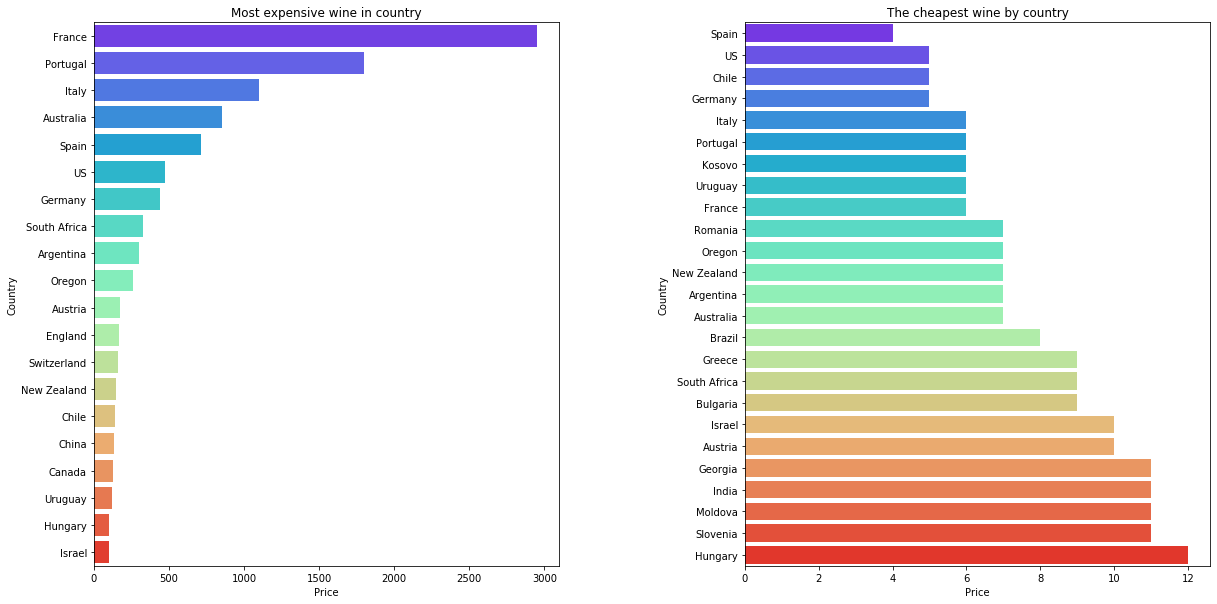

In [31]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax1, ax2 = ax.flatten()

country_price_max = df1.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:20]
sns.barplot(x = country_price_max['price'], y = country_price_max.index, palette= 'rainbow',ax=ax1)
ax1.set_title('Most expensive wine in country')
ax1.set_ylabel('Country')
ax1.set_xlabel('Price')
country_price_min = df1.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:25]
sns.barplot(x = country_price_min['price'], y = country_price_min.index, palette = 'rainbow',ax=ax2)
ax2.set_title('The cheapest wine by country')
ax2.set_ylabel('Country')
ax2.set_xlabel('Price')
plt.subplots_adjust(wspace=0.4);

### Country Highest and Least rated wines

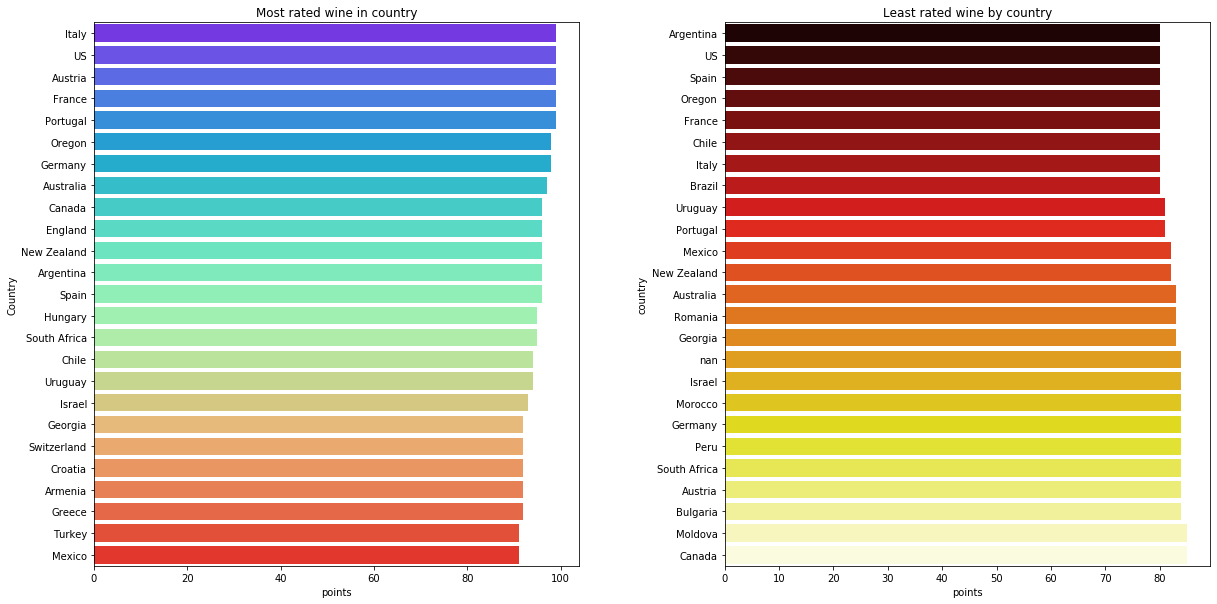

In [32]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax1,ax2 = ax.flatten()

country_points_max = df1.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:25]
sns.barplot(x = country_points_max['points'], y = country_points_max.index, palette= 'rainbow',ax=ax1)
ax1.set_title('Most rated wine in country')
ax1.set_ylabel('Country')
country_points_min = df1.groupby(['country'])['points'].min().sort_values(ascending=True).to_frame()[:25]
sns.barplot(x = country_points_min['points'], y = country_points_min.index, palette = 'hot',ax=ax2)
ax2.set_title('Least rated wine by country')
ax1.set_ylabel('Country')
plt.subplots_adjust(wspace=0.3);

### Points vs number of wines

In [33]:
total_points = df1["points"].value_counts()
df = pd.DataFrame({'points': total_points.index,'number of wines': total_points.values})

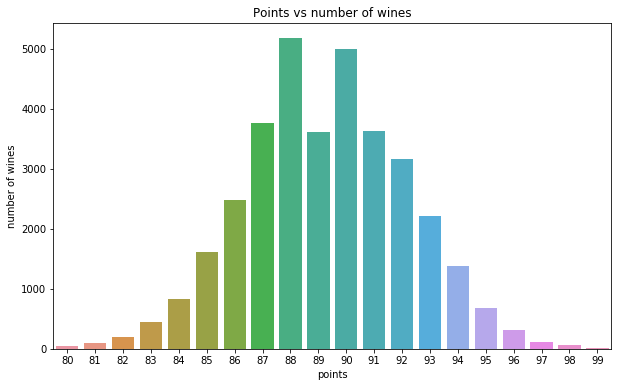

In [34]:
plt.figure(figsize = (10,6))
plt.title('Points vs number of wines')
sns.barplot(x = 'points', y='number of wines', data=df);

In [35]:
df1.to_csv('small_wine.csv', index=False)

In [36]:
df = pd.read_csv('small_wine.csv')

# BIG DATASET

In [37]:
vino = pd.read_csv('./winemag-data-190314 (1).csv')
print("Number of rows and columns:", vino.shape)

Number of rows and columns: (141617, 15)


In [38]:
vino.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vintage
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0


In [39]:
# Drop the Unnamed column.
# Drop Taster_twitter_handle I am not going to use it. 
vino.drop(["Unnamed: 0","taster_twitter_handle"], axis=1, inplace=True)

In [40]:
vino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141617 entries, 0 to 141616
Data columns (total 13 columns):
country        141556 non-null object
description    141617 non-null object
designation    101435 non-null object
points         141617 non-null int64
price          131959 non-null float64
province       141556 non-null object
region_1       118731 non-null object
region_2       54785 non-null object
taster_name    116700 non-null object
title          141617 non-null object
variety        141616 non-null object
winery         141617 non-null object
vintage        136383 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 14.0+ MB


In [41]:
#missing values
vino.isnull().sum()

country           61
description        0
designation    40182
points             0
price           9658
province          61
region_1       22886
region_2       86832
taster_name    24917
title              0
variety            1
winery             0
vintage         5234
dtype: int64

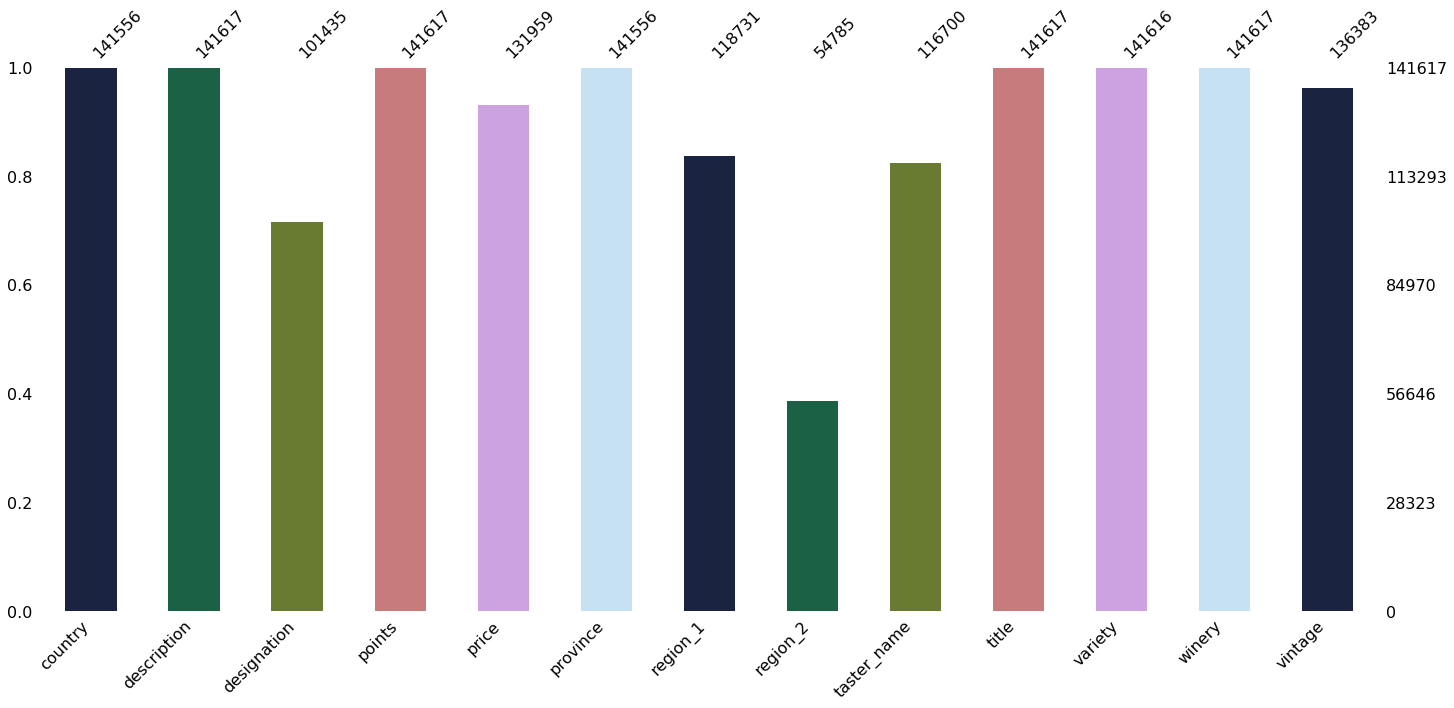

In [42]:
#Missing values
#This plot represents the number of values that are in each column. 
msno.bar(vino,color= sns.color_palette('cubehelix'));

In [43]:
vino[vino.country.isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines,2014.0
3124,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier,NaN
4229,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking,2012.0
9469,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis,2015.0
9710,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi,2015.0
11099,NaN,"A blend of 85% Melnik, 10% Grenache Noir and 5...",NaN,89,20.0,NaN,NaN,NaN,Jeff Jenssen,Orbelus 2013 Melnik,Melnik,Orbelus,2013.0
11297,NaN,"Light and fruity, this is a wine that has some...",Partager,82,NaN,NaN,NaN,NaN,Roger Voss,Barton & Guestier NV Partager White,White Blend,Barton & Guestier,NaN
13939,NaN,"This Furmint, grown in marl soils, has aromas ...",Márga,88,25.0,NaN,NaN,NaN,Jeff Jenssen,St. Donat 2013 Márga White,White Blend,St. Donat,2013.0
15871,NaN,"Jumpy, jammy aromas of foxy black fruits are s...",Valle de los Manantiales Vineyard,86,40.0,NaN,NaN,NaN,Michael Schachner,Familia Deicas 2015 Valle de los Manantiales V...,Tannat,Familia Deicas,2015.0
16617,NaN,Winemaker: Bartho Eksteen. This wooded Sauvy s...,Cape Winemakers Guild Vloekskoot Wooded,91,NaN,NaN,NaN,NaN,Lauren Buzzeo,Bartho Eksteen 2016 Cape Winemakers Guild Vloe...,Sauvignon Blanc,Bartho Eksteen,2016.0


In [44]:
# Drop the rows with null values in the 'price' and 'country' columns
vino = vino.dropna(axis=0, subset=['price', 'country'])

#At the moment I am not going to drop any row with null values in the other varibles 
vino.isnull().sum()

country            0
description        0
designation    37382
points             0
price              0
province           0
region_1       21088
region_2       77389
taster_name    23273
title              0
variety            1
winery             0
vintage         4757
dtype: int64

In [45]:
vino.shape

(131902, 13)

In [46]:
#duplicates. There is not duplicate in this DataFrame
duplicates = vino[ vino.duplicated(subset='description') & vino.duplicated(subset='title') & vino.duplicated(subset='designation')
                 & vino.duplicated(subset='taster_name')]
duplicates.shape

(0, 13)

In [47]:
vino.shape

(131902, 13)

In [48]:
vino.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,131902,43,US,58512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,131902,131872,"Aromas of citrus, melon and orange blossom sta...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,94520,40854,Reserve,2064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,131902,NaN,NaN,NaN,88.5357,3.08098,80,86,88,91,100
price,131902,NaN,NaN,NaN,36.2523,45.9906,4,17,26,44,5000
province,131902,450,California,38886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,110814,1270,Napa Valley,4598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,54513,19,Central Coast,11958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,108629,19,Roger Voss,22391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,131902,130468,\n,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#Drop region_2. There are some much missing values in this column and I am not going to use for this project.
vino.drop(["region_2"], axis=1, inplace=True)

In [50]:
vino.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,vintage
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011.0


### Country  Expensive and Cheap price wines

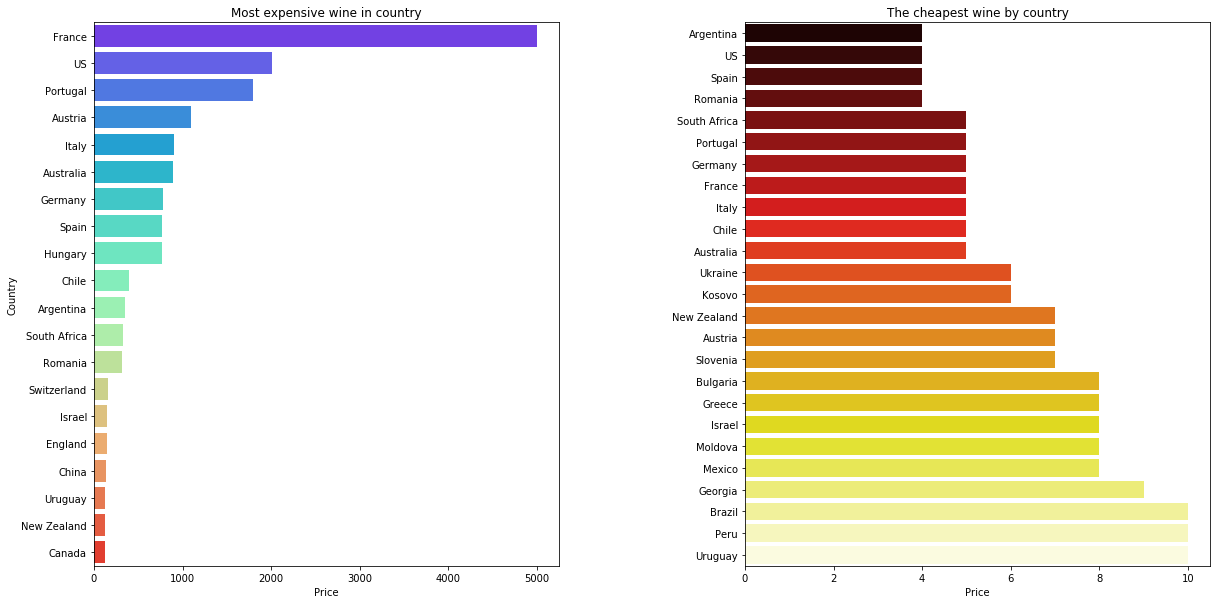

In [51]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax1, ax2 = ax.flatten()

country_price_max = vino.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:20]
sns.barplot(x = country_price_max['price'], y = country_price_max.index, palette= 'rainbow',ax=ax1)
ax1.set_title('Most expensive wine in country')
ax1.set_ylabel('Country')
ax1.set_xlabel('Price')
country_price_min = vino.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:25]
sns.barplot(x = country_price_min['price'], y = country_price_min.index, palette = 'hot',ax=ax2)
ax2.set_title('The cheapest wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('Price')
plt.subplots_adjust(wspace=0.4);

### Country Highest and Least rated wines

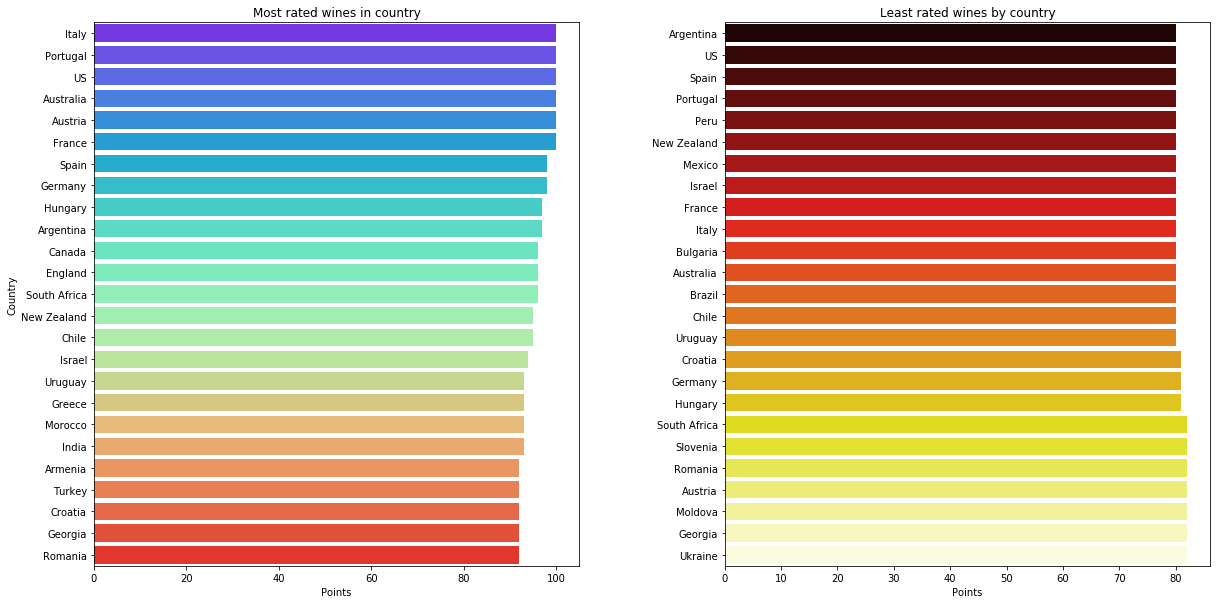

In [52]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax1,ax2 = ax.flatten()

country_points_max = vino.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:25]
sns.barplot(x = country_points_max['points'], y = country_points_max.index, palette= 'rainbow',ax=ax1)
ax1.set_title('Most rated wines in country')
ax1.set_ylabel('Country')
ax1.set_xlabel('Points')
country_points_min = vino.groupby(['country'])['points'].min().sort_values(ascending=True).to_frame()[:25]
sns.barplot(x = country_points_min['points'], y = country_points_min.index, palette = 'hot',ax=ax2)
ax2.set_title('Least rated wines by country')
ax2.set_ylabel('')
ax2.set_xlabel('Points')
plt.subplots_adjust(wspace=0.3);

### Points vs number of wines

In [53]:
total_points_vino = vino["points"].value_counts()
df_vino = pd.DataFrame({'points': total_points_vino.index,'number of wines': total_points_vino.values})


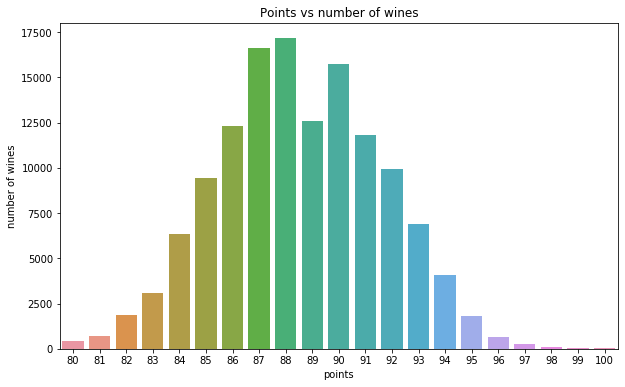

In [55]:
plt.figure(figsize = (10,6))
plt.title('Points vs number of wines')
sns.barplot(x = 'points', y='number of wines', data=df_vino);

In [56]:
vino.to_csv('big_wine.csv', index=False )

In [57]:
vino1 = pd.read_csv('big_wine.csv')

After do a first analyse of the two datasets, the number of points are similar, most of the wines have 87 and 88 points, and most of them are in ranges between 87-90 points.
In relation with the countries with the wines more expensive and cheaper do not differ so much.  The same happend with the countries with the highest and lowest points.

I decide I am going to work with the two data set and will compare the results.
I am also going to marge the two datasets.

After cleaning, the datasets contain:
    - Small dataset has 34837 rows and 12 columns
    - Big dataset has 131902 rows and 12 columns